In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [78]:
file_path = 'C:/Users/mkomu/Downloads/michelin_star.xlsx'

In [79]:
df = pd.read_excel(file_path)

In [80]:
print(df.head())

   Year      Restaurant Name  Year Received Michelin  Michelin Stars  \
0  2024           Steirereck                    2014               1   
1  2024  Eleven Madison Park                    2023               2   
2  2024               Gaggan                    2013               2   
3  2024              Manresa                    2023               2   
4  2024  Eleven Madison Park                    2017               1   

                  City      Country        Chef Name   Cuisine Type  Price  \
0               Tamion        Italy      Daniel Roca         French  $$$$$   
1  Loenen aan de Vecht  Netherlands   Heston Wareing         Indian  $$$$$   
2            Antwerpen      Belgium         Joan Roš       Japanese  $$$$$   
3     Nieuwkerken-Waas      Belgium    Alain Bottura  Mediterranean  $$$$$   
4              Hengelo  Netherlands  Mauro Colagreco         French   $$$$   

   Revenue Before Michelin Star  Annual Revenue(USD)  Number of Seats  \
0                 469180.

In [81]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          3192 non-null   int64  
 1   Restaurant Name               3192 non-null   object 
 2   Year Received Michelin        3192 non-null   int64  
 3   Michelin Stars                3192 non-null   int64  
 4   City                          3192 non-null   object 
 5   Country                       3192 non-null   object 
 6   Chef Name                     3192 non-null   object 
 7   Cuisine Type                  3192 non-null   object 
 8   Price                         3178 non-null   object 
 9   Revenue Before Michelin Star  3192 non-null   float64
 10  Annual Revenue(USD)           3192 non-null   float64
 11  Number of Seats               3192 non-null   int64  
 12  Years in Operation            3192 non-null   object 
 13  Cus

In [82]:
# Summary statistics
print(df.describe())

         Year  Year Received Michelin  Michelin Stars  \
count  3192.0             3192.000000     3192.000000   
mean   2024.0             2016.598997        1.973371   
std       0.0                3.989673        0.812920   
min    2024.0             2010.000000        1.000000   
25%    2024.0             2013.000000        1.000000   
50%    2024.0             2017.000000        2.000000   
75%    2024.0             2020.000000        3.000000   
max    2024.0             2023.000000        3.000000   

       Revenue Before Michelin Star  Annual Revenue(USD)  Number of Seats  \
count                   3192.000000         3.192000e+03      3192.000000   
mean                  529023.376938         8.186180e+05       109.015351   
std                   276405.860983         4.546075e+05        52.220491   
min                    50366.043933         6.313445e+04        20.000000   
25%                   282023.751305         4.376594e+05        63.000000   
50%                   53

In [83]:
# Data cleaning: Convert columns to numeric and handle errors
numeric_columns = ['Michelin Stars', 'Annual Revenue(USD)', 'Number of Seats', 'Years in Operation', 'Customer Reviews', 'Customer Ratings']
for column in numeric_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [84]:
# Drop rows with NaN values in the numeric columns
df_cleaned = df.dropna(subset=numeric_columns)

In [85]:
# Perform correlation analysis
# Selecting relevant numeric columns for correlation
numeric_columns = ['Michelin Stars', 'Number of Seats', 'Years in Operation', 'Customer Reviews', 'Customer Ratings']
correlation_matrix = df[numeric_columns].corr()

In [95]:
# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                    Michelin Stars  Number of Seats  Years in Operation  \
Michelin Stars            1.000000        -0.018933            0.000453   
Number of Seats          -0.018933         1.000000           -0.016706   
Years in Operation        0.000453        -0.016706            1.000000   
Customer Reviews         -0.009249         0.015222           -0.006944   
Customer Ratings         -0.001544         0.009290            0.003258   

                    Customer Reviews  Customer Ratings  
Michelin Stars             -0.009249         -0.001544  
Number of Seats             0.015222          0.009290  
Years in Operation         -0.006944          0.003258  
Customer Reviews            1.000000          0.017916  
Customer Ratings            0.017916          1.000000  


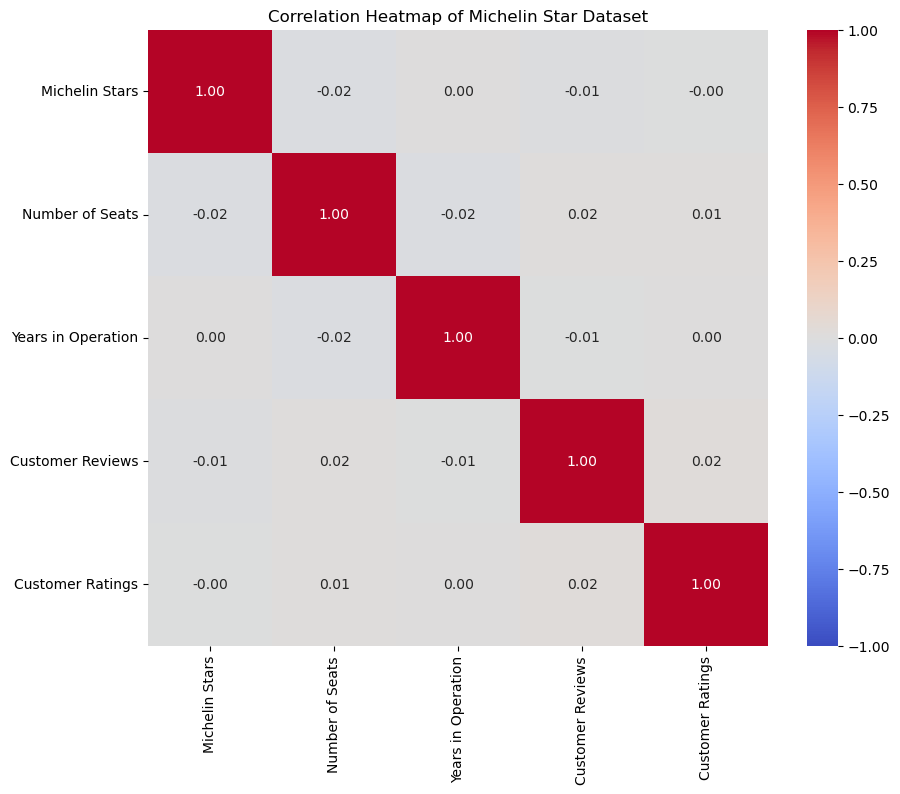

In [96]:
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Michelin Star Dataset')
plt.show()

In [90]:
# Group by Cuisine and count the number of Michelin stars
cuisine_win_count = df_cleaned.groupby('Cuisine Type')['Michelin Stars'].sum().sort_values(ascending=False)

# Display the result
print("Number of Michelin Stars Won by Each Cuisine:")
print(cuisine_win_count)

Number of Michelin Stars Won by Each Cuisine:
Cuisine Type
French           692
Mexican          679
Italian          658
Thai             657
Spanish          655
Mediterranean    640
Japanese         632
Indian           574
Chinese          557
American         552
Name: Michelin Stars, dtype: int64


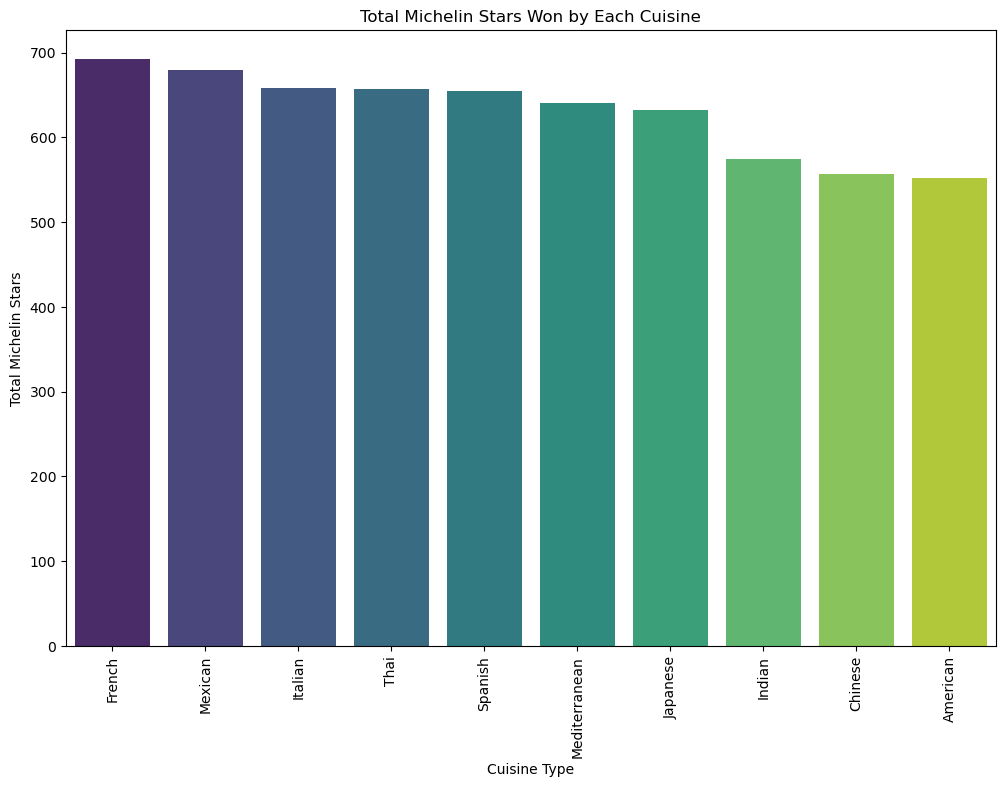

In [108]:
# Plot the bar chart for the cuisines
plt.figure(figsize=(12, 8))
sns.barplot(x=cuisine_win_count.index, y=cuisine_win_count.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Cuisine Type')
plt.ylabel('Total Michelin Stars')
plt.title('Total Michelin Stars Won by Each Cuisine')
plt.show()

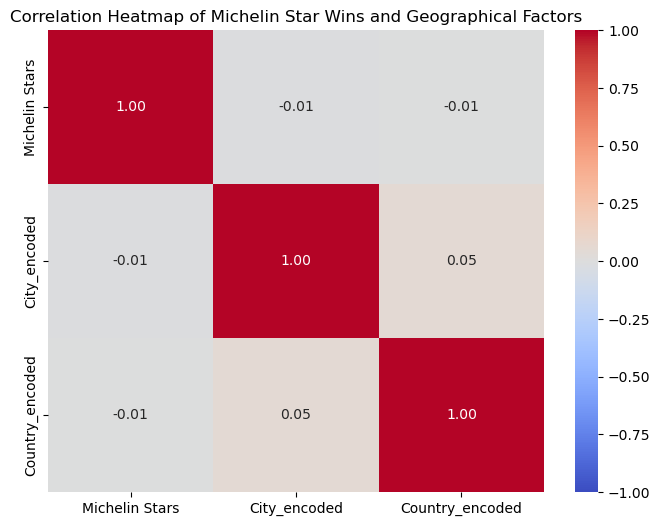

In [98]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)

# Set titles and labels
plt.title('Correlation Heatmap of Michelin Star Wins and Geographical Factors')
plt.show()

C:\Users\mkomu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\mkomu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 143 (\x8f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


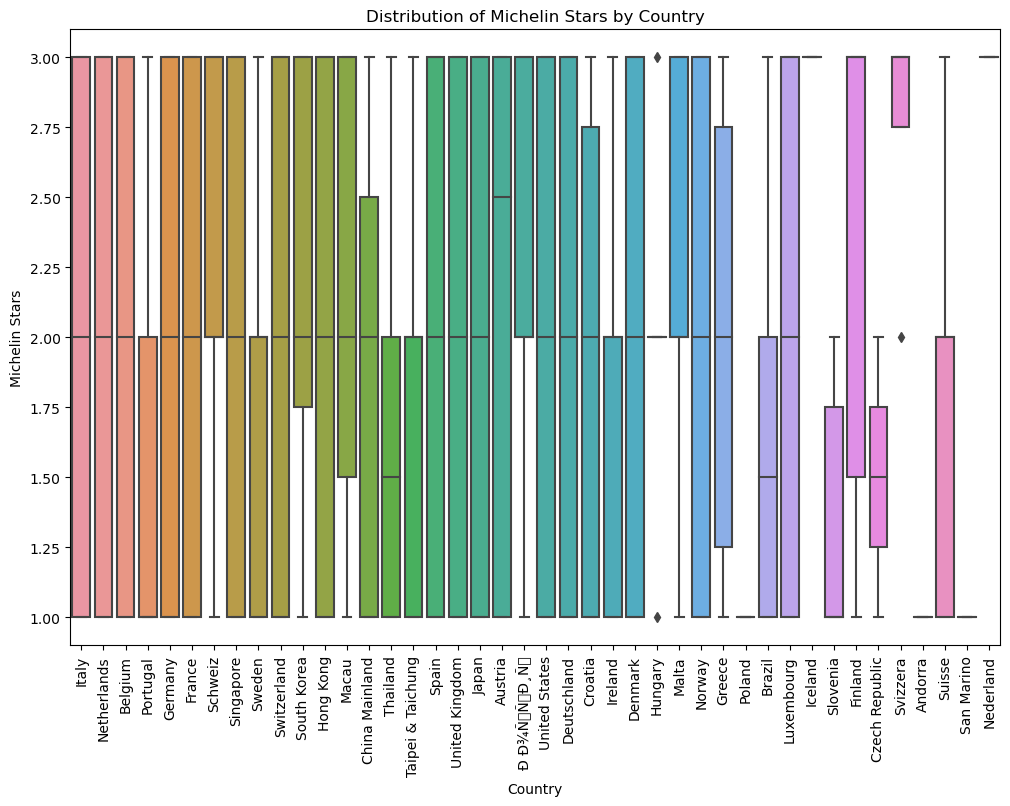

In [93]:
# Additional visualization to see distribution of Michelin Stars by Country
plt.figure(figsize=(12, 8))
sns.boxplot(x='Country', y='Michelin Stars', data=df_cleaned)
plt.xticks(rotation=90)
plt.title('Distribution of Michelin Stars by Country')
plt.show()

Country
France               617
Japan                406
Italy                375
Germany              231
Spain                228
United States        198
United Kingdom       176
Belgium              125
Netherlands          109
China Mainland       107
Switzerland           86
Hong Kong             71
Deutschland           63
Singapore             49
Taipei & Taichung     34
Portugal              33
South Korea           32
Thailand              32
Denmark               27
Sweden                19
Name: count, dtype: int64


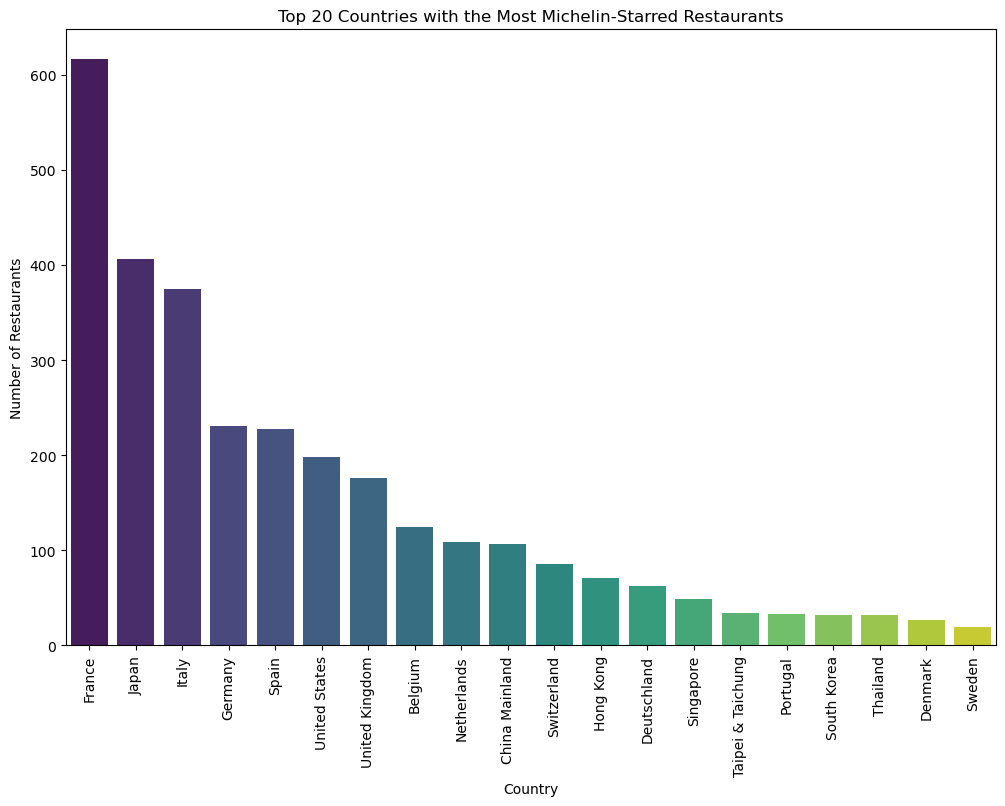

In [107]:
# Count the number of restaurants in each country
country_restaurant_counts = df_cleaned['Country'].value_counts().sort_values(ascending=False)

# Display the top countries with the most restaurants
top_countries = country_restaurant_counts.head(20)
print(top_countries)

# Plot the bar chart for the top countries
plt.figure(figsize=(12, 8))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Number of Restaurants')
plt.title('Top 20 Countries with the Most Michelin-Starred Restaurants')
plt.show()

In [100]:
# Define a function to calculate the percentage of revenue difference
def calculate_revenue_difference(row):
    revenue_before = row['Revenue Before Michelin Star']
    revenue_after = row['Annual Revenue(USD)']
    percentage_difference = ((revenue_after - revenue_before) / revenue_before) * 100
    return percentage_difference

# Apply the function to the dataframe
df['Revenue Difference (%)'] = df.apply(calculate_revenue_difference, axis=1)

# Display the updated dataframe with the new column
df.head()

,Year,Restaurant Name,Year Received Michelin,Michelin Stars,City,Country,Chef Name,Cuisine Type,Price,Revenue Before Michelin Star,Annual Revenue(USD),Number of Seats,Years in Operation,Customer Reviews,Customer Ratings,Revenue Difference (%)
0,2024,Steirereck,2014,1,Tamion,Italy,Daniel Roca,French,$$$$$,469180.602462,8.071290e+05,37,11.0,786,1.67,72.029491
1,2024,Eleven Madison Park,2023,2,Loenen aan de Vecht,Netherlands,Heston Wareing,Indian,$$$$$,195650.404204,3.536470e+05,60,33.0,4297,1.90,80.754550
2,2024,Gaggan,2013,2,Antwerpen,Belgium,Joan Roš,Japanese,$$$$$,147715.713576,1.999740e+05,64,34.0,4128,2.26,35.377629
3,2024,Manresa,2023,2,Nieuwkerken-Waas,Belgium,Alain Bottura,Mediterranean,$$$$$,607298.977360,1.121439e+06,127,8.0,4726,1.01,84.660080
4,2024,Eleven Madison Park,2017,1,Hengelo,Netherlands,Mauro Colagreco,French,$$$$,715963.547985,8.137205e+05,48,35.0,1019,1.05,13.653901


In [103]:
# Calculate the average percentage of revenue difference
average_percentage_difference = df['Revenue Difference (%)'].mean()
print(average_percentage_difference)

54.761702129306066
